In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
(x_train, y_mnist_train), (x_test, y_mnist_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
x_train0 = x_train[y_mnist_train == 0]
x_train1 = x_train[y_mnist_train == 1]
x_train2 = x_train[y_mnist_train == 2]
x_train3 = x_train[y_mnist_train == 3]
x_train4 = x_train[y_mnist_train == 4]
x_train5 = x_train[y_mnist_train == 5]
x_train6 = x_train[y_mnist_train == 6]
x_train7 = x_train[y_mnist_train == 7]
x_train8 = x_train[y_mnist_train == 8]
x_train9 = x_train[y_mnist_train == 9]
print(f'{x_train0.shape}: X Train Label 0, {x_train1.shape}: X Train Label 1')
print(f'{x_train2.shape}: X Train Label 2, {x_train3.shape}: X Train Label 3')
print(f'{x_train4.shape}: X Train Label 4, {x_train5.shape}: X Train Label 5')
print(f'{x_train6.shape}: X Train Label 6, {x_train7.shape}: X Train Label 7')
print(f'{x_train8.shape}: X Train Label 8, {x_train9.shape}: X Train Label 9')

(5923, 28, 28, 1): X Train Label 0, (6742, 28, 28, 1): X Train Label 1
(5958, 28, 28, 1): X Train Label 2, (6131, 28, 28, 1): X Train Label 3
(5842, 28, 28, 1): X Train Label 4, (5421, 28, 28, 1): X Train Label 5
(5918, 28, 28, 1): X Train Label 6, (6265, 28, 28, 1): X Train Label 7
(5851, 28, 28, 1): X Train Label 8, (5949, 28, 28, 1): X Train Label 9


In [8]:
y_mnist_train0 = y_mnist_train[y_mnist_train == 0]
y_mnist_train1 = y_mnist_train[y_mnist_train == 1]
y_mnist_train2 = y_mnist_train[y_mnist_train == 2]
y_mnist_train3 = y_mnist_train[y_mnist_train == 3]
y_mnist_train4 = y_mnist_train[y_mnist_train == 4]
y_mnist_train5 = y_mnist_train[y_mnist_train == 5]
y_mnist_train6 = y_mnist_train[y_mnist_train == 6]
y_mnist_train7 = y_mnist_train[y_mnist_train == 7]
y_mnist_train8 = y_mnist_train[y_mnist_train == 8]
y_mnist_train9 = y_mnist_train[y_mnist_train == 9]
print(f'{y_mnist_train0.shape}: y Train Label 0, {y_mnist_train1.shape}: y Train Label 1')
print(f'{y_mnist_train2.shape}: y Train Label 2, {y_mnist_train3.shape}: y Train Label 3')
print(f'{y_mnist_train4.shape}: y Train Label 4, {y_mnist_train5.shape}: y Train Label 5')
print(f'{y_mnist_train6.shape}: y Train Label 6, {y_mnist_train7.shape}: y Train Label 7')
print(f'{y_mnist_train8.shape}: y Train Label 8, {y_mnist_train9.shape}: y Train Label 9')

(5923,): y Train Label 0, (6742,): y Train Label 1
(5958,): y Train Label 2, (6131,): y Train Label 3
(5842,): y Train Label 4, (5421,): y Train Label 5
(5918,): y Train Label 6, (6265,): y Train Label 7
(5851,): y Train Label 8, (5949,): y Train Label 9


In [9]:
traindata = np.vstack((x_train0, x_train1[:6683], x_train2, x_train3, x_train4[:5818], x_train5[:5403], x_train6[:5894],
                       x_train7[:6252], x_train8[:5849], x_train9))

In [10]:
traindata_shuffled = shuffle(traindata, random_state=42)

In [11]:
print(traindata_shuffled.shape)

(59860, 28, 28, 1)


In [12]:
import pickle

with open ('/content/drive/MyDrive/Deep Learning/636_project1_train_images', 'rb') as trainfile:
  noisyimages = pickle.load(trainfile)

with open ('/content/drive/MyDrive/Deep Learning/636_project1_train_labels', 'rb') as labelsfile:
  noisylabels = pickle.load(labelsfile)

In [13]:
noisyimages = np.array(noisyimages)
noisylabels = np.array(noisylabels)

noisyimages = noisyimages.astype('float32') / 255
noisyimages = noisyimages.reshape(len(noisyimages), 28, 28, 1)
print(noisyimages.shape)

(60000, 28, 28, 1)


In [14]:
x_train_noisy0 = noisyimages[noisylabels == 0]
x_train_noisy1 = noisyimages[noisylabels == 1]
x_train_noisy2 = noisyimages[noisylabels == 2]
x_train_noisy3 = noisyimages[noisylabels == 3]
x_train_noisy4 = noisyimages[noisylabels == 4]
x_train_noisy5 = noisyimages[noisylabels == 5]
x_train_noisy6 = noisyimages[noisylabels == 6]
x_train_noisy7 = noisyimages[noisylabels == 7]
x_train_noisy8 = noisyimages[noisylabels == 8]
x_train_noisy9 = noisyimages[noisylabels == 9]
print(f'{x_train_noisy0.shape}: X Train Noisy Label 0, {x_train_noisy1.shape}: X Train Noisy Label 1')
print(f'{x_train_noisy2.shape}: X Train Noisy Label 2, {x_train_noisy3.shape}: X Train Noisy Label 3')
print(f'{x_train_noisy4.shape}: X Train Noisy Label 4, {x_train_noisy5.shape}: X Train Noisy Label 5')
print(f'{x_train_noisy6.shape}: X Train Noisy Label 6, {x_train_noisy7.shape}: X Train Noisy Label 7')
print(f'{x_train_noisy8.shape}: X Train Noisy Label 8, {x_train_noisy9.shape}: X Train Noisy Label 9')

(5972, 28, 28, 1): X Train Noisy Label 0, (6683, 28, 28, 1): X Train Noisy Label 1
(6010, 28, 28, 1): X Train Noisy Label 2, (6156, 28, 28, 1): X Train Noisy Label 3
(5818, 28, 28, 1): X Train Noisy Label 4, (5403, 28, 28, 1): X Train Noisy Label 5
(5894, 28, 28, 1): X Train Noisy Label 6, (6252, 28, 28, 1): X Train Noisy Label 7
(5849, 28, 28, 1): X Train Noisy Label 8, (5963, 28, 28, 1): X Train Noisy Label 9


In [15]:
y_noisy_train0 = noisylabels[noisylabels == 0]
y_noisy_train1 = noisylabels[noisylabels == 1]
y_noisy_train2 = noisylabels[noisylabels == 2]
y_noisy_train3 = noisylabels[noisylabels == 3]
y_noisy_train4 = noisylabels[noisylabels == 4]
y_noisy_train5 = noisylabels[noisylabels == 5]
y_noisy_train6 = noisylabels[noisylabels == 6]
y_noisy_train7 = noisylabels[noisylabels == 7]
y_noisy_train8 = noisylabels[noisylabels == 8]
y_noisy_train9 = noisylabels[noisylabels == 9]
print(f'{y_noisy_train0.shape}: y Train Label 0, {y_noisy_train1.shape}: y Train Label 1')
print(f'{y_noisy_train2.shape}: y Train Label 2, {y_noisy_train3.shape}: y Train Label 3')
print(f'{y_noisy_train4.shape}: y Train Label 4, {y_noisy_train5.shape}: y Train Label 5')
print(f'{y_noisy_train6.shape}: y Train Label 6, {y_noisy_train7.shape}: y Train Label 7')
print(f'{y_noisy_train8.shape}: y Train Label 8, {y_noisy_train9.shape}: y Train Label 9')

(5972,): y Train Label 0, (6683,): y Train Label 1
(6010,): y Train Label 2, (6156,): y Train Label 3
(5818,): y Train Label 4, (5403,): y Train Label 5
(5894,): y Train Label 6, (6252,): y Train Label 7
(5849,): y Train Label 8, (5963,): y Train Label 9


In [16]:
traindata_noisy = np.vstack((x_train_noisy0[:5923], x_train_noisy1, x_train_noisy2[:5958], x_train_noisy3[:6131], x_train_noisy4,
                             x_train_noisy5, x_train_noisy6, x_train_noisy7, x_train_noisy8, x_train_noisy9[:5949]))

In [17]:
traindata_noisy_shuffled = shuffle(traindata_noisy, random_state=42)

In [18]:
print(traindata_noisy_shuffled.shape)

(59860, 28, 28, 1)


In [19]:
model = Sequential([
                    # encoder network
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    tf.keras.layers.MaxPooling2D(2, padding='same'),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    tf.keras.layers.MaxPooling2D(2, padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          1

In [20]:
history = model.fit(traindata_noisy, traindata, epochs=16, batch_size=128)

Epoch 1/16
468/468 [==============================] - 35s 49ms/step - loss: 0.2703
Epoch 2/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2585
Epoch 3/16
468/468 [==============================] - 22s 48ms/step - loss: 0.2507
Epoch 4/16
468/468 [==============================] - 23s 49ms/step - loss: 0.2479
Epoch 5/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2459
Epoch 6/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2446
Epoch 7/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2434
Epoch 8/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2422
Epoch 9/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2415
Epoch 10/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2405
Epoch 11/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2395
Epoch 12/16
468/468 [==============================] - 22s 47ms/step - loss: 0.2387
E

In [21]:
model.save('/content/drive/MyDrive/Deep Learning/autoencoder_edition3_256_16_maxPooling_notShuffled.keras')

In [20]:
autoencoder = tf.keras.saving.load_model(
    '/content/drive/MyDrive/Deep Learning/autoencoder_edition3_256_16_maxPooling_notShuffled.keras'
)

In [21]:
pred = autoencoder.predict(noisyimages)

1875/1875 [==============================] - 10s 5ms/step


In [22]:
predTest0 = autoencoder.predict(noisyimages[noisylabels==0][5924:])
predTest1 = autoencoder.predict(noisyimages[noisylabels==1][5000:])
predTest2 = autoencoder.predict(noisyimages[noisylabels==2][5959:])
predTest3 = autoencoder.predict(noisyimages[noisylabels==3][6132:])
predTest4 = autoencoder.predict(noisyimages[noisylabels==4][5000:])
predTest5 = autoencoder.predict(noisyimages[noisylabels==5][5000:])
predTest6 = autoencoder.predict(noisyimages[noisylabels==6][5000:])
predTest7 = autoencoder.predict(noisyimages[noisylabels==7][5000:])
predTest8 = autoencoder.predict(noisyimages[noisylabels==8][5000:])
predTest9 = autoencoder.predict(noisyimages[noisylabels==9][5950:])

1/1 [==============================] - 0s 266ms/step


In [23]:
def display(array1, array2, labels):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    print(f'Labels provided for the images: {labels[indices]}')

    for i, (image1, image2) in enumerate(zip(images1, images2)):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

Labels provided for the images: [7 1 1 7 9 3 7 7 9 5]


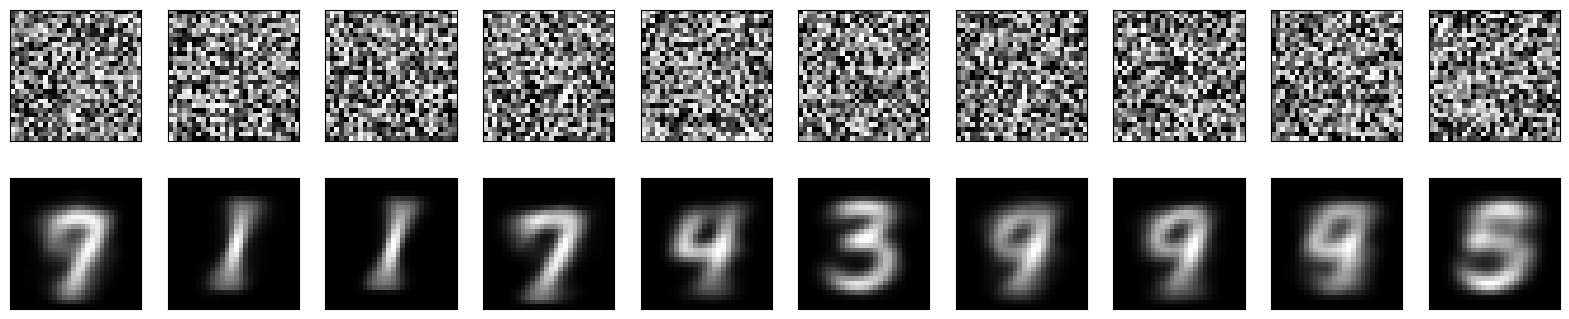

In [25]:
display(noisyimages, pred, noisylabels)

In [ ]:
display(np.array(noisyimages[noisylabels==0][5924:]), predTest0, np.array(noisylabels[noisylabels==0][5924:]))

In [ ]:
display(np.array(noisyimages[noisylabels==1][5000:]), predTest1, np.array(noisylabels[noisylabels==1][5000:]))

In [ ]:
display(np.array(noisyimages[noisylabels==2][5959:]), predTest2, np.array(noisylabels[noisylabels==2][5959:]))

In [ ]:
display(np.array(noisyimages[noisylabels==3][6132:]), predTest3, np.array(noisylabels[noisylabels==3][6132:]))

In [ ]:
display(np.array(noisyimages[noisylabels==4][5000:]), predTest4, np.array(noisylabels[noisylabels==4][5000:]))

In [ ]:
display(np.array(noisyimages[noisylabels==5][5000:]), predTest5, np.array(noisylabels[noisylabels==5][5000:]))

In [ ]:
display(np.array(noisyimages[noisylabels==6][5000:]), predTest6, np.array(noisylabels[noisylabels==6][5000:]))

In [ ]:
display(np.array(noisyimages[noisylabels==7][5000:]), predTest7, np.array(noisylabels[noisylabels==7][5000:]))

In [ ]:
display(np.array(noisyimages[noisylabels==8][5000:]), predTest8, np.array(noisylabels[noisylabels==8][5000:]))

In [ ]:
display(np.array(noisyimages[noisylabels==9][5950:]), predTest9, np.array(noisylabels[noisylabels==9][5950:]))

In [26]:
from sklearn.model_selection import train_test_split

X = pred
y = noisylabels

X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train_clf = np.vstack((X_train_clf, x_train, x_test))

In [28]:
y_train_clf = np.hstack((y_train_clf, y_mnist_train, y_mnist_test))

In [29]:
y_train_clf = tf.one_hot(y_train_clf, depth = 10)
y_val_clf = tf.one_hot(y_val_clf, depth = 10)

In [30]:
print(X_train_clf.shape, y_train_clf.shape)
print(X_val_clf.shape, y_val_clf.shape)

(118000, 28, 28, 1) (118000, 10)
(12000, 28, 28, 1) (12000, 10)


In [31]:
from keras import layers

clf2=Sequential()

#clf2.add(Lambda(standardize,input_shape=(28,28,1)))
clf2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
clf2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
clf2.add(MaxPooling2D(pool_size=(2,2)))
clf2.add(layers.BatchNormalization())

clf2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
clf2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
clf2.add(MaxPooling2D(pool_size=(2,2)))
clf2.add(layers.BatchNormalization())

clf2.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
clf2.add(MaxPooling2D(pool_size=(2,2)))
clf2.add(layers.BatchNormalization())

clf2.add(layers.Flatten())
clf2.add(Dense(512,activation="relu"))

clf2.add(Dense(10,activation="softmax"))

clf2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
clf2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)        

In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [34]:
train_gen = datagen.flow(X_train_clf, y_train_clf, batch_size=128)
test_gen = datagen.flow(X_val_clf, y_val_clf, batch_size=128)

In [35]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

In [36]:
epochs = 50
batch_size = 128
train_steps = X_train_clf.shape[0] // batch_size
valid_steps = X_val_clf.shape[0] // batch_size

es = EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=5, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, #
     )

rp = ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [ ]:
history_clf2 = clf2.fit_generator(train_gen,
                              epochs = epochs,
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps,
                              callbacks=[es, rp])

Epoch 1/50


<ipython-input-37-f345d4a9fbd1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_clf2 = clf2.fit_generator(train_gen,


921/921 [==============================] - ETA: 0s - loss: 0.5067 - accuracy: 0.8385

921/921 [==============================] - 54s 53ms/step - loss: 0.5067 - accuracy: 0.8385 - val_loss: 1.0760 - val_accuracy: 0.6672 - lr: 0.0010
Epoch 2/50
921/921 [==============================] - ETA: 0s - loss: 0.4520 - accuracy: 0.8550

921/921 [==============================] - 49s 53ms/step - loss: 0.4520 - accuracy: 0.8550 - val_loss: 1.0921 - val_accuracy: 0.6702 - lr: 0.0010
Epoch 3/50
920/921 [============================>.] - ETA: 0s - loss: 0.4418 - accuracy: 0.8583

921/921 [==============================] - 46s 50ms/step - loss: 0.4417 - accuracy: 0.8583 - val_loss: 1.0179 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 4/50
921/921 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.8596

921/921 [==============================] - 45s 49ms/step - loss: 0.4356 - accuracy: 0.8596 - val_loss: 1.0087 - val_accuracy: 0.6715 - lr: 0.0010


In [ ]:
clf2.save('/content/drive/MyDrive/Deep Learning/classifier_CNN_BatchNorm_50_augmented.keras')

In [ ]:
history_clf_dict = history_clf2.history
loss_values = history_clf_dict["loss"]
val_loss_values = history_clf_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(5,2))
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
acc = history_clf_dict["accuracy"]
val_acc = history_clf_dict["val_accuracy"]
plt.figure(figsize=(5,2))
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()